In [27]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
import csv
import random

In [18]:
def save_low_activity(in_dir, times_file, savefile):
    '''
    Saves the initial and final time indices of "low activity"
    Parameters: 
        in_dir: folder where the csv files of the recordings are
        times_file: csv file with the initial and final time indices of the detected activities
        savefile: csv file where the initial and final time indices of "low activity" will be saved
    '''
    
    df_times = pd.read_csv(times_file)
    files = glob.glob("{}*.csv".format(in_dir))
    
    savelist = [['File', 'Initial time index of low', 'Final time index of low']]
    
    for index, row in df_times.iterrows():
        file = row['File']
        initial = row['Initial time index of activity']
        final = row['Final time index of activity']
        if initial != 0:
            savelist.append([file, 0, initial - 1])
        if final != -1:
            savelist.append([file, final + 1 , -1])

    with open(savefile, "w", newline="") as f:
        writer = csv.writer(f)
        writer.writerows(savelist)
    print('Initial and final times of "low activity" saved in file {}'.format(savefile))

In [67]:
def plot_low_activity(df, title):
    '''Plots a dataframe'''
    
    cols = []
    color = []
    for s in sensors:
        for bp in bodyparts:
            for a in axes:
                cols.append('{}{}{}'.format(bp,s,a))
                color.append('tab:blue')
                
    df = df.iloc[initial:final]
    
    df.plot.line(x='time', y = cols, legend = False, color = color, figsize = (15,4));
    
    plt.title(title)
    #plt.xticks([])
    
    print(title)

In [62]:
def plot_examples(in_dir, times_low_activity, num_random_examples = 10, min_len = 500):
    '''
    Plot a number of examples of "low activity"
    Parameters: 
        in_dir: folder where the csv files of the recordings are
        times_low_activity: csv file where the initial and final time indices of "low activity" are
        num_random_examples: number of examples to plot
        min_len: minimum number of timesteps that an example must have to be considered
    '''
    
    df_times = pd.read_csv(times_low_activity)
    files = glob.glob("{}*.csv".format(in_dir))
    
    examples = []
    while len(examples) < num_random_examples:
        example = random.choice(range(len(df_times)))
        
        if example in examples:
            continue
            
        file = df_times['File'].iloc[example]
        initial = df_times['Initial time index of low'].iloc[example]
        final = df_times['Final time index of low'].iloc[example]
    
        df = pd.read_csv(file)
        final = len(df) if final == -1 else final
        
        if final - initial < min_len:
            continue
            
        df = df.iloc[initial:final]
        plot_low_activity(df, file) 
        
        examples.append(example)


# -------------------------------------- End of functions -------------------------------------------

C:\Users\Rafael\OneDrive - Delft University of Technology\Data\Split\football_6_38.csv
C:\Users\Rafael\OneDrive - Delft University of Technology\Data\Split\football_4_8.csv
C:\Users\Rafael\OneDrive - Delft University of Technology\Data\Split\football_3_34.csv
C:\Users\Rafael\OneDrive - Delft University of Technology\Data\Split\football_4_19.csv
C:\Users\Rafael\OneDrive - Delft University of Technology\Data\Split\football_6_61.csv


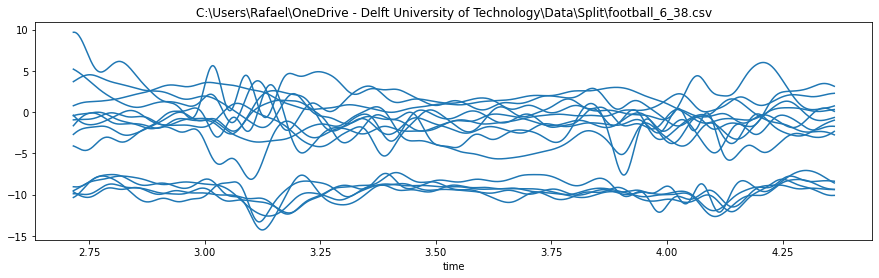

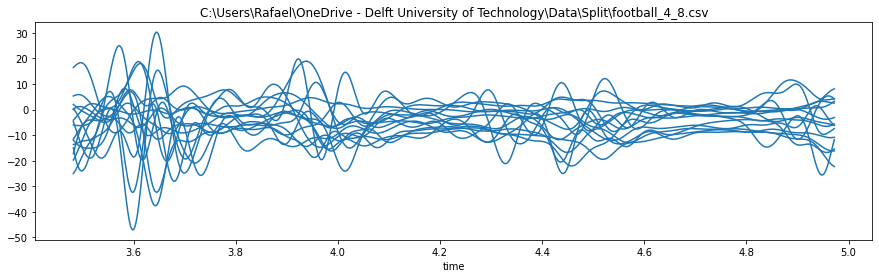

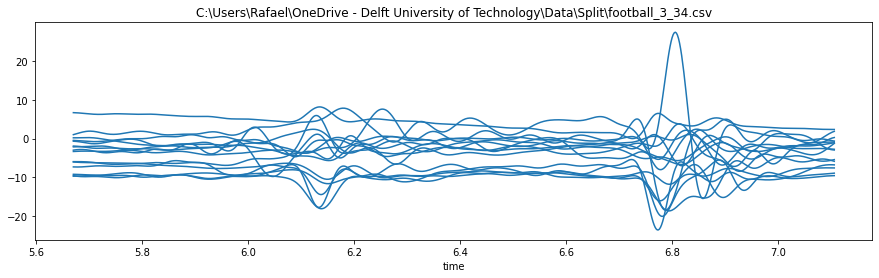

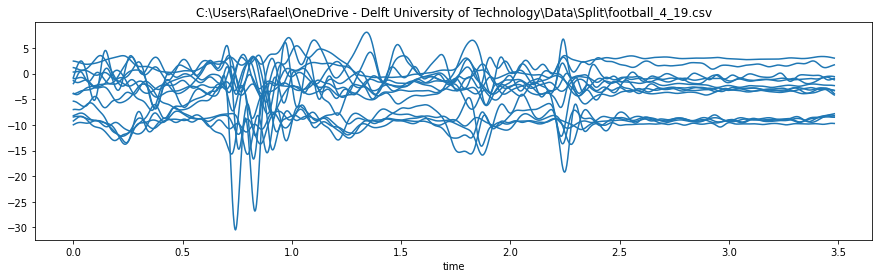

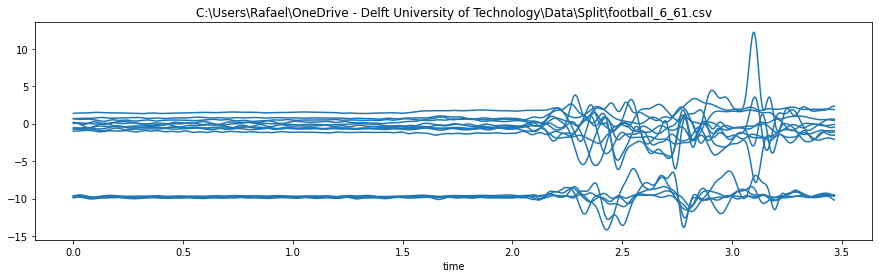

In [68]:
### Parameters ###

# Folder where the recordings are
in_dir = r'C:\Users\Rafael\OneDrive - Delft University of Technology\Data\Split/'

# csv where the recordings with extracted activities are
times_file = r'C:\Users\Rafael\OneDrive - Delft University of Technology\Activity detection\activity_times.csv'

# csv where the recordings with extracted low activities will be saved
times_low_activity = r'C:\Users\Rafael\OneDrive - Delft University of Technology\Activity detection\low_activity_times.csv'

sensors = ['Acc'] # Only accelerometers are used for activity detection
bodyparts = ['leftShank', 'rightShank', 'leftThigh', 'rightThigh', 'pelvis']
axes = ['X', 'Y', 'Z']


In [ ]:
## Main
save_low_activity(in_dir, times_file, times_low_activity)


In [ ]:
## Plot examples
random.seed(0)
plot_examples(in_dir, times_low_activity, num_random_examples = 5)